In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('draftkings18-19.csv')

In [6]:
df['Date'] = pd.to_datetime(df['Date']) 

In [8]:
df.set_index('Date', inplace=True)

In [15]:
df.sort_index(ascending=True, inplace=True)

In [17]:
df.head()

,Player,Team,Match-up,W/L,Min,Pts,FGM,FGA,FG%,3PM,...,REB,AST,STL,BLK,TOV,PF,+/-,D/D,T/D,DraftKings
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-22,Anthony Davis,LAL,@LAC,L,37,25,8,21,38.1,0,...,9,5,1,2,3,3,3,0,0,48.25
2019-10-22,Josh Hart,NOP,@TOR,L,28,15,4,9,44.4,3,...,10,1,0,1,1,4,-1,1,0,33.50
2019-10-22,Kenrich Williams,NOP,@TOR,L,18,3,0,4,0.0,0,...,6,3,1,2,1,5,11,0,0,20.50
2019-10-22,Nickeil Alexander-Walker,NOP,@TOR,L,12,3,1,10,10.0,1,...,4,2,2,0,1,2,6,0,0,15.00
2019-10-22,Pascal Siakam,TOR,vs.NOP,W,38,34,11,26,42.3,2,...,18,5,0,1,4,6,5,1,0,66.50


In [19]:
df['W/L'] = df['W/L'].map({'W': 1, 'L': 0})

In [20]:
df.head()

,Player,Team,Match-up,W/L,Min,Pts,FGM,FGA,FG%,3PM,...,REB,AST,STL,BLK,TOV,PF,+/-,D/D,T/D,DraftKings
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-22,Anthony Davis,LAL,@LAC,0,37,25,8,21,38.1,0,...,9,5,1,2,3,3,3,0,0,48.25
2019-10-22,Josh Hart,NOP,@TOR,0,28,15,4,9,44.4,3,...,10,1,0,1,1,4,-1,1,0,33.50
2019-10-22,Kenrich Williams,NOP,@TOR,0,18,3,0,4,0.0,0,...,6,3,1,2,1,5,11,0,0,20.50
2019-10-22,Nickeil Alexander-Walker,NOP,@TOR,0,12,3,1,10,10.0,1,...,4,2,2,0,1,2,6,0,0,15.00
2019-10-22,Pascal Siakam,TOR,vs.NOP,1,38,34,11,26,42.3,2,...,18,5,0,1,4,6,5,1,0,66.50


In [23]:
# Function to get game logs for player put in
def player_stats(player_name):
    for player in df['Player'].unique():
        return df[df['Player'] == player_name]

In [55]:
# stats for 'Chris Paul'
data_cp = player_stats('Chris Paul')

In [35]:
df.to_csv('cleaned_2019-20.csv', index=False)

In [56]:
data_cp = data_cp[['Player','DraftKings']]

In [57]:
data_cp['lag_1'] = data_cp['DraftKings'].shift(1)

# Create a column called `lag_2` that lags Passengers by two months.
data_cp['lag_2'] =data_cp['DraftKings'].shift(2)

# Create a column called `seasonal_12` that lags Passengers by one year.
data_cp['lag_3'] =data_cp['DraftKings'].shift(3)

data_cp['lag_4'] = data_cp['DraftKings'].shift(4)

# Create a column called `lag_2` that lags Passengers by two months.
data_cp['lag_5'] =data_cp['DraftKings'].shift(5)

# Create a column called `seasonal_12` that lags Passengers by one year.
data_cp['lag_6'] =data_cp['DraftKings'].shift(6)


# Create a variable called `time` that takes on a value of 0 in January 1949,
# then increases by 1 each month until the end of the dataframe.
data_cp['time'] = range(0,len(data_cp))

In [58]:
data_cp.head()

,Player,DraftKings,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,time
Date,,,,,,,,,
2019-10-23,Chris Paul,40.00,NaN,NaN,NaN,NaN,NaN,NaN,0
2019-10-25,Chris Paul,12.00,40.0,NaN,NaN,NaN,NaN,NaN,1
2019-10-27,Chris Paul,18.50,12.0,40.0,NaN,NaN,NaN,NaN,2
2019-10-28,Chris Paul,28.50,18.5,12.0,40.0,NaN,NaN,NaN,3
2019-10-30,Chris Paul,37.25,28.5,18.5,12.0,40.0,NaN,NaN,4


In [62]:
from sklearn.model_selection import train_test_split

In [87]:

# Generate train/test split.
X_train, X_test, y_train, y_test = train_test_split(data_cp.drop(columns = ['DraftKings', 'Player']),
                                                    data_cp['DraftKings'],
                                                    test_size = 0.4,
                                                   shuffle=False) # Very important in TSA! 
                                        # We don't want our data to be randomly shuffled - we want to keep the order!

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42, 7)
(28, 7)
(42,)
(28,)


In [97]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [90]:
X_train = sm.add_constant(X_train)
X_train

/Users/willhanley/opt/anaconda3/envs/nba/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,time
Date,,,,,,,,
2019-10-23,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2019-10-25,1.0,40.00,NaN,NaN,NaN,NaN,NaN,1
2019-10-27,1.0,12.00,40.00,NaN,NaN,NaN,NaN,2
2019-10-28,1.0,18.50,12.00,40.00,NaN,NaN,NaN,3
2019-10-30,1.0,28.50,18.50,12.00,40.00,NaN,NaN,4
2019-11-02,1.0,37.25,28.50,18.50,12.00,40.00,NaN,5
2019-11-05,1.0,35.75,37.25,28.50,18.50,12.00,40.00,6
2019-11-07,1.0,38.50,35.75,37.25,28.50,18.50,12.00,7
2019-11-09,1.0,31.50,38.50,35.75,37.25,28.50,18.50,8


In [91]:
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

In [92]:
lm = sm.OLS(y_train,X_train)
# lm = sm.OLS(y_train, X_train)

In [93]:
lm_results = lm.fit()
X_test = sm.add_constant(X_test)

In [99]:
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:             DraftKings   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                 -0.182
Method:                 Least Squares   F-statistic:                    0.2303
Date:                Mon, 21 Dec 2020   Prob (F-statistic):              0.974
Time:                        16:58:57   Log-Likelihood:                -128.44
No. Observations:                  36   AIC:                             272.9
Df Residuals:                      28   BIC:                             285.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.1762     17.988      2.567      0.0

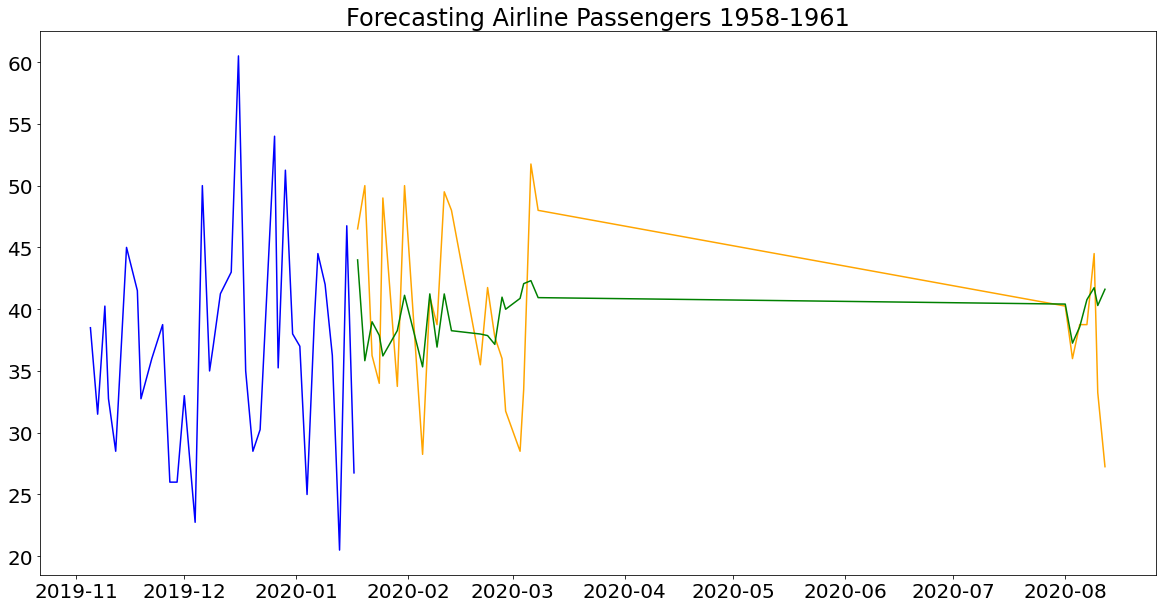

In [95]:
import matplotlib.pyplot as plt
# Let's plot our predictions! 

# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, y_train.values, color = 'blue')

# Plot testing data.
plt.plot(y_test.index, y_test.values, color = 'orange')

# Plot predicted test values.
plt.plot(lm_results.predict(X_test), color = 'green')

# Set label.
plt.title(label = 'Forecasting Airline Passengers 1958-1961', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);